<a href="https://colab.research.google.com/github/ghaida79/Final-Project/blob/main/Online_Retail_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail Data Analysis

In this notebook, I will use a transnational data set that contains all the transactions occurring between 01-12-2010 and 09-12-2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

I am going to:
1.   Explore, clean, and prepare the data using EDA
2.   Visualize the data using Plotly, Matplotlib, and Seaborn to have the answers to some business questions
3.   Classify the customers based on their buying behavior using K-Means clustering



## Exploratory Data Analysis 

1- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

%matplotlib inline


2- Reading the dataset

In [2]:
df = pd.read_csv('retail_data.csv', encoding = 'ISO-8859-1') #there is some non-ascii character and it can't be encoded
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


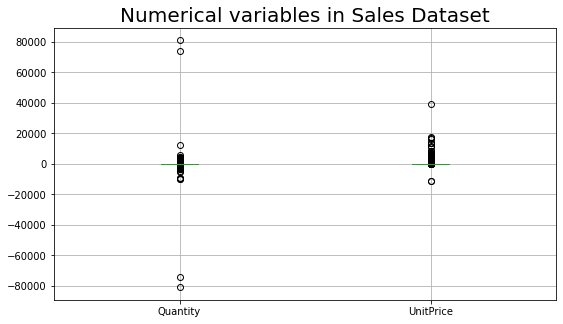

In [5]:
cols = ['Quantity','UnitPrice']
plt.figure(figsize=(9,5))
df[cols].boxplot()
plt.title("Numerical variables in Sales Dataset", fontsize=20)
plt.show()

3- Dealing with missing and negative values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [8]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


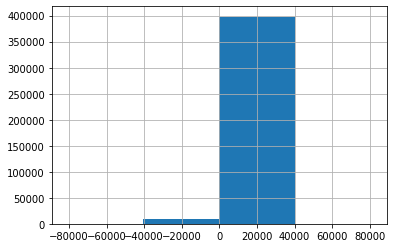

In [10]:
df['Quantity'].hist(bins=4)

In [11]:
df= df[df.Quantity > 0 ]

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


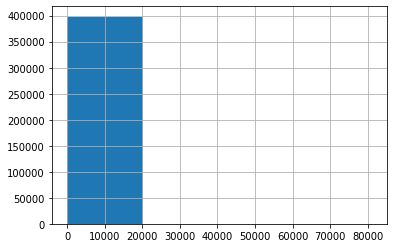

In [13]:
df['Quantity'].hist(bins=4)

4- Modifying the data types and adding new columns 

In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Time'] = df['InvoiceDate'].dt.time
df.drop(columns='InvoiceDate', inplace= True)

In [17]:
df['CustomerID'] = df['CustomerID'].astype(object)
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID      object
Country         object
Year             int64
Month            int64
Day              int64
Time            object
dtype: object

In [18]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [19]:
df['Description'] = df['Description'].str.lower()

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Revenue
0,536365,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,2010,12,1,08:26:00,15.30
1,536365,71053,white metal lantern,6,3.39,17850,United Kingdom,2010,12,1,08:26:00,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850,United Kingdom,2010,12,1,08:26:00,22.00
3,536365,84029G,knitted union flag hot water bottle,6,3.39,17850,United Kingdom,2010,12,1,08:26:00,20.34
4,536365,84029E,red woolly hottie white heart.,6,3.39,17850,United Kingdom,2010,12,1,08:26:00,20.34


In [21]:
df = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity','UnitPrice','Revenue','Year','Month','Day','Time','CustomerID','Country']]


The cleaned data frame 

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Revenue,Year,Month,Day,Time,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2.55,15.30,2010,12,1,08:26:00,17850,United Kingdom
1,536365,71053,white metal lantern,6,3.39,20.34,2010,12,1,08:26:00,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2.75,22.00,2010,12,1,08:26:00,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,3.39,20.34,2010,12,1,08:26:00,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,3.39,20.34,2010,12,1,08:26:00,17850,United Kingdom


## Data Visualization

With data visualization, we can answer some business questions to make better decisions.

* How many customers do we have in each country?

In [23]:
df_vis1 = df.groupby(['Country'])[['CustomerID']].count()
df_vis1.reset_index(inplace=True)
df_vis1.rename(columns = {'CustomerID': 'Number of Customers'}, inplace = True)

f= px.pie(df_vis1, values='Number of Customers', names='Country', 
          title='Number of Customers by Country', 
          width = 1000, height = 700)
f.update_traces(textposition='inside', textinfo='percent+label')

f.show()


* How many orders do we receive per month and per day?

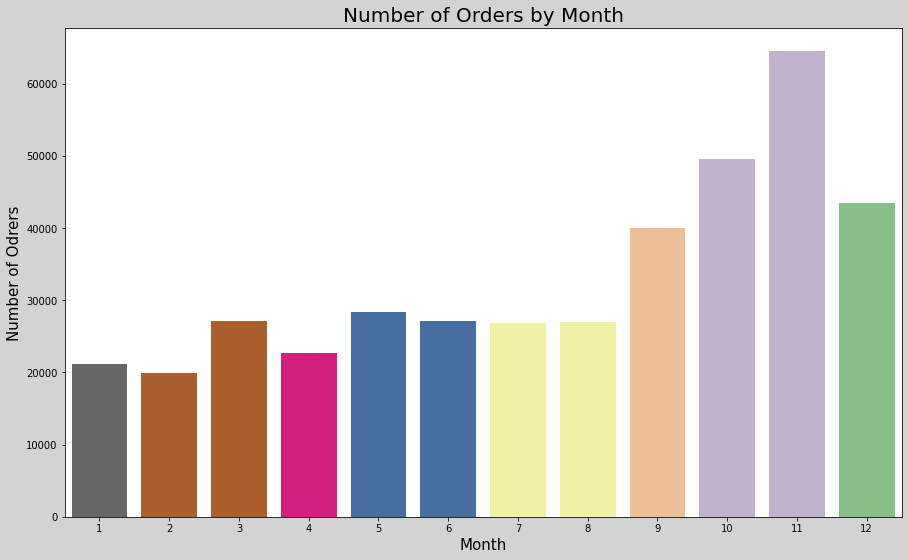

In [24]:
df_vis2 = df.groupby(['Month'])[['InvoiceNo']].count()
df_vis2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x="Month", y="InvoiceNo", data=df_vis2, palette='Accent_r')
ax.set_xlabel("Month", size=15)
ax.set_ylabel('Number of Odrers',size=15)
ax.set_title("Number of Orders by Month", size=20)
f.patch.set_facecolor('lightgrey')


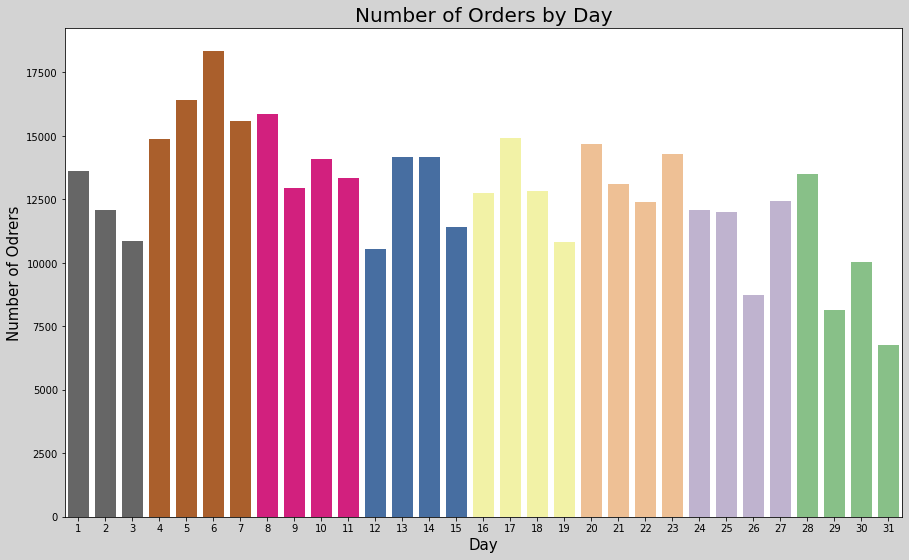

In [25]:
df_vis3 = df.groupby(['Day'])[['InvoiceNo']].count()
df_vis3.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x="Day", y="InvoiceNo", data=df_vis3, palette='Accent_r')
ax.set_xlabel("Day", size=15)
ax.set_ylabel('Number of Odrers',size=15)
ax.set_title("Number of Orders by Day", size=20)
f.patch.set_facecolor('lightgrey')

* What is the relationship between the number of units sold and the unit price?

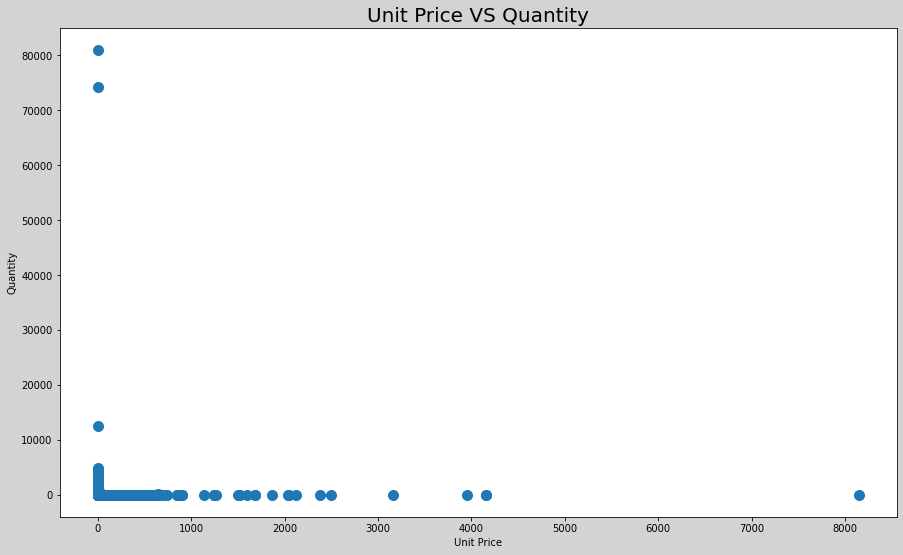

In [26]:
f, ax = plt.subplots(figsize=(15, 9))
plt.scatter(x="UnitPrice", y="Quantity", data=df, s=100)
ax.set_title("Unit Price VS Quantity", size=20)
ax.set_xlabel('Unit Price')
ax.set_ylabel('Quantity')
f.patch.set_facecolor('lightgrey')


Preparing the dataset for the dashboard that shows the revenue gained from different countries and the number of orders received in different time series.

In [27]:
df_vis4 = df.groupby(['Country','CustomerID','Year','Month'])[['Revenue']].sum()
df_vis4.reset_index(inplace=True)
df_vis4['CustomerID'] = df_vis4['CustomerID'].astype(object)

df_vis4.head()

,Country,CustomerID,Year,Month,Revenue
0,Australia,12386,2010,12,258.90
1,Australia,12386,2011,1,143.00
2,Australia,12388,2011,1,431.30
3,Australia,12388,2011,2,124.05
4,Australia,12388,2011,3,210.90


In [28]:
df_vis5= df.groupby(['Country','Year','Month'])[['InvoiceNo']].count()
df_vis5

InvoiceNo
Country     Year Month           
Australia   2010 12            32
            2011 1            127
                 2             89
                 3            108
                 4             18
...                           ...
Unspecified 2011 4             16
                 5             47
                 6              9
                 7            149
                 8             23

[287 rows x 1 columns]

In [29]:
pip install jupyter-dash

In [30]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash


In [31]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__)

In [32]:
app.layout= html.Div( 
    id="root",
    style={'backgroundColor': 'plum', 'width': '70%', 'display': 'inline-block'},

    children=[
        html.Div(
            id="header",
            children=[
               html.H1("Retail Sales Dashboard", style={'text-align': 'center'}),
                html.P(
                    id="description",
                    children="This dashboard shows the revenue gained from different countries and the number of orders received in different time series. ",
                    style={'text-align': 'center'}
                ),
            ],
        ),
        html.Div(
            dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2010", "value": 2010},
                     {"label": "2011", "value": 2011}],
                 multi=False,
                 value=2011,
                 style={'width': "55%", 'padding': '0px 20px'}
                 )
        ),
        html.Br(),

        html.Div(
            html.P(
                id="text",
                children="Drag the slider to change the month:"),
               style={'padding': '0px 20px'}
        ),
        html.Div(

              dcc.Slider(id = "slct_month",
                         min=1,
                         max=12,
                         marks={i: 'Month {}'.format(i) for i in range(13)},
                         value=12),
        ),
        html.Br(),

        html.Div([
            dcc.Graph(id='map', figure={}),],
            style={'padding': '0px 80px', 'width': '80%' }

        ),  

        html.Div([
            dcc.Graph(id='bar', figure={}),],
            style={'padding': '5px 80px', 'width': '80%'}
        )
      ]  )     

In [33]:

@app.callback(
     Output(component_id='map', component_property='figure'),
    Input(component_id='slct_year', component_property='value'), 
    Input(component_id='slct_month', component_property='value')
)

def map_graph(os1, os2):
    print(os1)
    print(type(os1))
    print(os1)
    print(type(os1))


    dfc1 = df_vis4.copy()
    dfc1 = dfc1[dfc1["Year"] == os1]
    dfc1 = dfc1[dfc1["Month"] == os2]

    # Plotly Express
    fig1 = px.choropleth(
        data_frame=dfc1,
        locationmode = 'country names',
        locations='Country',
        color='Revenue',
        hover_data=['Country', 'Revenue'],
       # color_continuous_scale=px.colors.sequential.YlOrRd, 
        color_continuous_scale= 'dense',
        labels={'The Revenue': ''},
       template='plotly_dark'

    )
    return  fig1

@app.callback(
    Output(component_id='bar', component_property='figure'),
    Input(component_id='slct_year', component_property='value'), 
    Input(component_id='slct_month', component_property='value')
)
def bar_graph(os1, os2):
    print(os1)
    print(type(os1))
    print(os1)
    print(type(os1))

    dfc2 = df_vis5.copy()
    dfc2 = dfc2[dfc2["Year"] == os1]
    dfc2 = dfc2[dfc2["Month"] == os2]


    fig2 = px.bar(dfc2, x='Country', y='InvoiceNo',
             hover_data=['Country', 'InvoiceNo'], color='Country',
             labels={'Number of orders ':'population of Canada'}, height=400)



    return fig2

In [34]:
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

## Customer Classification Using K-Means Clustring

I will use K-Means clustering to create 4 segments of the customers based on their buying behavior.

In [35]:
df_c = df.groupby('CustomerID')[['Quantity','Revenue']].sum()
df_c.reset_index(inplace=True)
df_c['CustomerID'] = df_c['CustomerID'].astype(object)

df_c = df_c[['Quantity','Revenue','CustomerID']]
df_c

,Quantity,Revenue,CustomerID
0,74215,77183.60,12346
1,2458,4310.00,12347
2,2341,1797.24,12348
3,631,1757.55,12349
4,197,334.40,12350
...,...,...,...
4334,45,180.60,18280
4335,54,80.82,18281
4336,103,178.05,18282
4337,1397,2094.88,18283


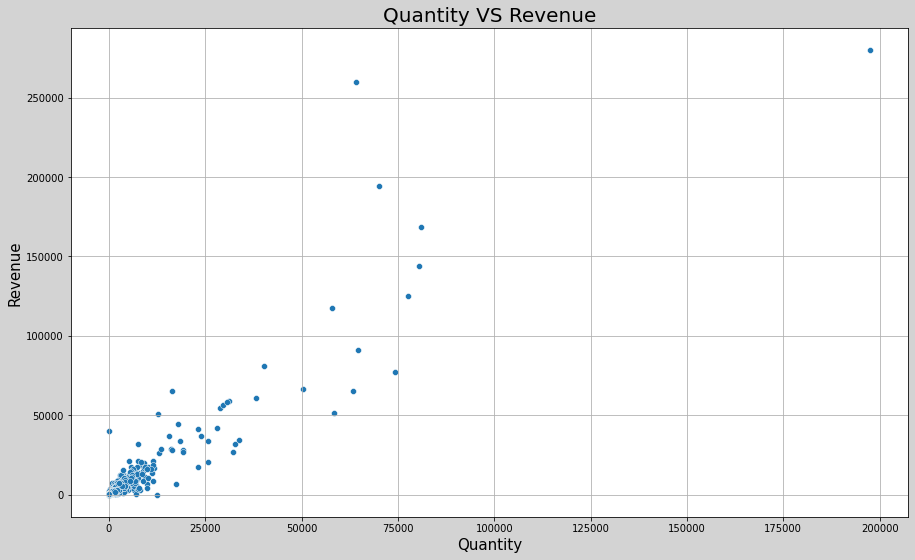

In [36]:
f, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(x=df_c['Quantity'], y=df_c['Revenue'])
ax.set_xlabel("Quantity", size=15)
ax.set_ylabel('Revenue',size=15)
ax.set_title("Quantity VS Revenue", size=20)
ax.grid()
f.patch.set_facecolor('lightgrey')

In [37]:
X = df_c.iloc[:, 0:2].values


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Customers segments are plotted in the following figure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



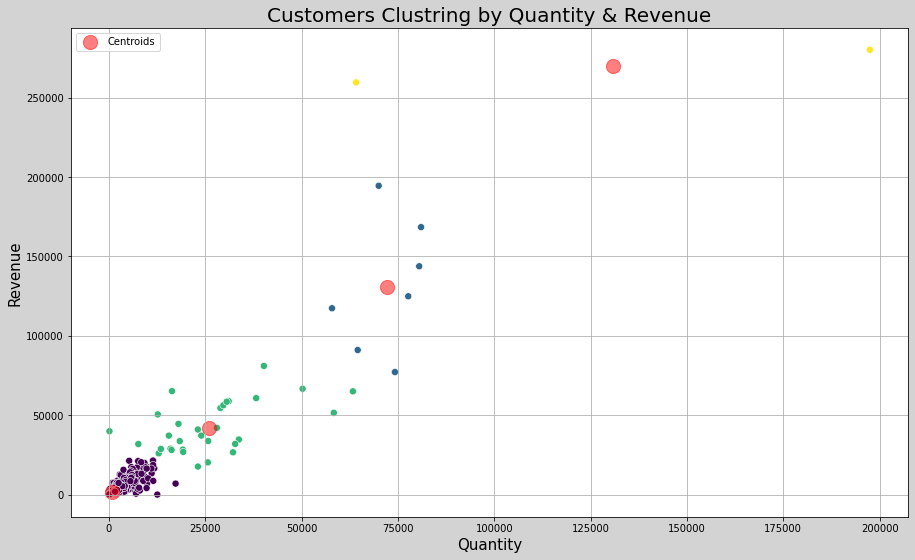

In [39]:
f, ax = plt.subplots(figsize=(15, 9))

sns.scatterplot(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', palette='Accent_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label = 'Centroids')
ax.set_xlabel("Quantity", size=15)
ax.set_ylabel('Revenue',size=15)
ax.set_title("Customers Clustring by Quantity & Revenue", size=20)
ax.legend()
ax.grid()
f.patch.set_facecolor('lightgrey')
